**Spinodal decomposition**

Benchmark problem 1: https://pages.nist.gov/pfhub/benchmarks/benchmark1.ipynb/

**Contributor**: Qian (Jennifer) Zhang, INL, qian.jennifer.zhang@gmail.com

**Free energy functional**:

$$F=\int_V (f_{chem}+\frac{\kappa}{2}|\nabla c|^2) dx$$

where $f_{chem}$ is the chemical free energy density and $\kappa$ is the gradient energy coefficient. For this problem, we choose $f_{chem}$ to have a simple polynomial form,

$$f_{chem}(c) = \rho_s(c-c_\alpha)^2(c-c_\beta)^2$$

**The Cahn-Hilliard Equation** is

$$\frac{\partial c}{\partial t}=\nabla\cdot[M\nabla(\frac{\partial f_{chem}}{\partial c}-\kappa \Delta c)]$$

$+$ Period boundary condition

**Numerical Angorithm**: Fully explicit first order Eulerian in time and second order finite difference in space.

**Efficiency of this code**:

Parameters taken in the test:

$\rho_s = 5$, $\kappa=2$, $M=5$, $c_\alpha=0.3$, $c_\beta=0.7$,

$dt = 1e-5$, $dxx=1/dx^2=1$, 

nsteps = 60000

$64\times 64$ ~ 20s/60000steps

$128\times 128$ ~ 60s/60000steps

$256\times 256$ ~ 429s/60000steps

The user can test by themselves with %%timeit or %%time on the cell they would like to test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

class solver_CH():
    def __init__(self,rho,kappa,M,ca,cb):
        self.rho = rho
        self.kappa = kappa
        self.M = M
        self.ca = ca
        self.cb = cb
        
    def dfchemdc(self,w):
        return 2.0*self.rho*(w-self.ca)*(w-self.cb)*(2.0*w-self.ca-self.cb)
    
    def delta_c(self,w,dxx):
        nx = w.shape[0]
        ny = w.shape[1]
        
        #initialize intermediate values
        w_x_pre = np.zeros((nx,ny))
        w_x_la = np.zeros((nx,ny))
        w_y_pre = np.zeros((nx,ny))
        w_y_la = np.zeros((nx,ny))
        
        # periodic boundary condition in x direction
        w_x_pre[0:nx-1,:] = w[1:nx,:] 
        w_x_pre[nx-1,:] = w[0,:]
        
        w_x_la[1:nx,:] = w[0:nx-1,:] 
        w_x_la[0,:] = w[nx-1,:]
        
        # periodic boundary condition in y direction
        w_y_pre[:,0:ny-1] = w[:,1:ny] 
        w_y_pre[:,ny-1] = w[:,0]
        
        w_y_la[:,1:ny] = w[:,0:ny-1] 
        w_y_la[:,0] = w[:,ny-1]
        
        #dxx=1/dx**2
        return (w_x_la-2*w+w_x_pre)*dxx+(w_y_la-2*w+w_y_pre)*dxx
        
    
    def Solve_CH(self,dt,dxx,c):
        nx = c.shape[0]
        ny = c.shape[1]
        
        mu = np.zeros((nx,ny))
        c_new = np.zeros((nx,ny))
        
        mu = self.dfchemdc(c)-self.kappa*self.delta_c(c,dxx)     
        c_new = c + dt*self.M*self.delta_c(mu,dxx)
        return c_new

In [2]:
def initial_cond(nx,ny):
    c_init = 0.5 + np.random.randn(nx, ny)*0.05
    return c_init

In [3]:
def visualize_2d(c,n):
    plt.imshow(c, cmap='bwr')
    plt.title('concentration at T='+str(n))
    plt.colorbar()
    plt.show()

In [4]:
nx = 128
ny = 128
c_new = np.zeros((nx,ny)) # zero clear
c_init = initial_cond(nx,ny)

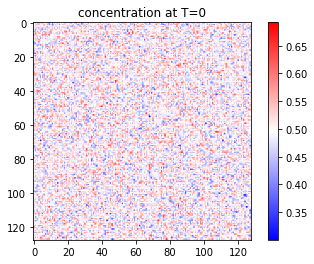

In [5]:
visualize_2d(c_init,0)

In [6]:
nsteps = 1000

In [7]:
%%timeit
#rho = 5, kappa=2, M=5, ca=0.3, cb=0.7
#dt = 1e-5, dxx=1/dx**2=1
Solver = solver_CH(5,2,5,0.3,0.7)
for nstep in range(1,nsteps+1):
    c_new = Solver.Solve_CH(1e-5,1,c_init)
    c_init[:,:] = c_new[:,:] 

797 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


nstep =  300
Maximum concentration =  0.54717619157669
Minimum concentration =  0.4495298742860651


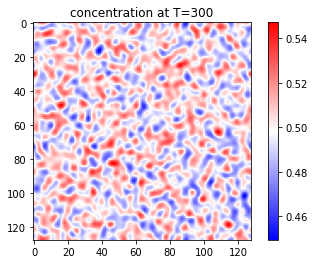

nstep =  600
Maximum concentration =  0.5469080497299083
Minimum concentration =  0.45011336513441147


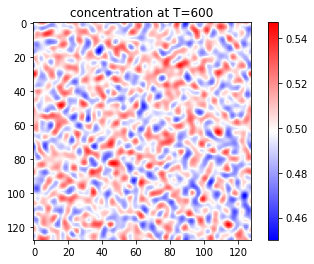

nstep =  900
Maximum concentration =  0.5466607653729961
Minimum concentration =  0.4505629166630608


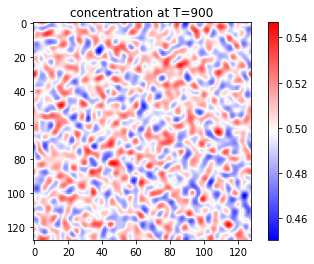

In [8]:
#Visulization

#rho = 5, kappa=2, M=5, ca=0.3, cb=0.7
#dt = 1e-5, dxx=1/dx**2=1
Solver = solver_CH(5,2,5,0.3,0.7)
for nstep in range(1,nsteps+1):
    c_new = Solver.Solve_CH(1e-5,1,c_init)
    c_init[:,:] = c_new[:,:] 
    
    if nstep % 300 == 0:
        print('nstep = ', nstep)
        print('Maximum concentration = ', np.max(c_new))
        print('Minimum concentration = ', np.min(c_new))
        visualize_2d(c_new,nstep)